<a href="https://colab.research.google.com/github/kartoone/cosc470s24/blob/main/examplecode/matplotlib_nn_weights_and_biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 28.52 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [2]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

(784, 1)
(28, 28)


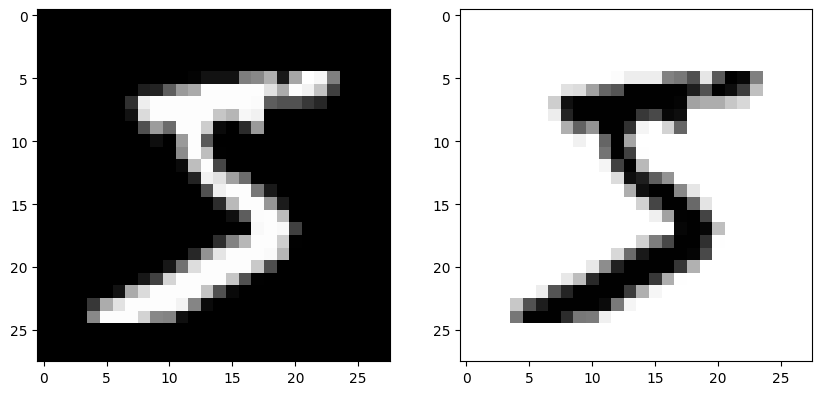

In [8]:
import numpy as np
import matplotlib.pyplot as plt
print(np.shape(training_data[0][0]))

# reshape the training_img so that it's a 2d 28x28 image instead of a flat 784 pixel line
training_img_0 = np.reshape(training_data[0][0], (28,28))
print(np.shape(training_img_0))

# setup our figure area size
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# plot using the normal grayscale mapping to see the true nature of the input training data
# in the left column of our figure
axs[0].imshow(training_img_0, cmap='gray', vmin=0, vmax=1)

# now use the "reverse" color map "gray_r" to display it the way humans expect this kind of data to look like
axs[1].imshow(training_img_0, cmap='gray_r', vmin=0, vmax=1)


In [24]:
import numpy as np
np.set_printoptions(linewidth=5000)

# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 5 so we don't have to wait as long
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
original_weights = net.weights

# print the shape of the connections between the input layer and the hidden layer
print(np.shape(original_weights[0]))

# print the shape of the connections between the hidden layer and the output layer
print(np.shape(original_weights[1]))

# now let's look at ALL 784 incoming connections to the first neuron in the hidden layer
print(np.shape(original_weights[0][0]))
print(original_weights[0][0])

# now let's look at ALL 30 incoming connections to the first neuron in the output layer
print(original_weights[1][0])
print(np.shape(original_weights[1][0]))


(30, 784)
(10, 30)
(784,)
[ 0.359555   -0.52937577  1.41159725 -1.01753181 -0.24473306  0.45646662  0.63795332  0.74197666  0.83749997 -1.60116127 -0.48648891 -0.15217853 -0.48594114 -0.51739848  0.30362202  0.23712367 -0.65738114 -2.26689232 -0.69171859 -0.63096493 -0.32276612 -1.90026461  1.65935648  0.38923879 -1.36834893 -1.41351522 -1.67008077  1.29897298  1.02783786  0.51195766  0.32050486 -0.87583273  0.05774133  0.61388483 -0.42024605 -0.66553001 -1.59986111  0.41264756 -0.59321435 -0.0446704   0.30537249  1.0949241  -1.32174664  0.90467208  0.51731127 -0.86739968 -0.3518685   0.01681334 -1.0664497  -1.77260387 -0.3375561  -0.64489246  1.41043805  1.56479512  1.07622629  0.87650337  1.10508409 -0.19758897  0.04110606 -0.36593594 -0.72465375 -0.39987342 -0.63323411 -0.73597077 -0.37024696 -1.24605313  0.62205432 -0.13753586  0.96766831 -0.08865209  0.90200617 -0.20714084  1.29380209 -1.44940968  1.5196141  -0.85058206 -0.01094264 -0.79336397  1.53944568  1.12661166  0.21020504  

In [25]:
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)
# now let's look at ALL 784 incoming connections to the first neuron in the hidden layer
print(np.shape(net.weights[0][0]))
print(net.weights[0][0])

# now let's look at ALL 30 incoming connections to the first neuron in the output layer
print(net.weights[1][0])
print(np.shape(net.weights[1][0]))

Epoch 0 : 8258 / 10000
Epoch 1 : 9241 / 10000
Epoch 2 : 9355 / 10000
Epoch 3 : 9380 / 10000
Epoch 4 : 9404 / 10000
(784,)
[ 0.359555   -0.52937577  1.41159725 -1.01753181 -0.24473306  0.45646662  0.63795332  0.74197666  0.83749997 -1.60116127 -0.48648891 -0.15217853 -0.4885471  -0.52310171  0.30362528  0.23712381 -0.65738114 -2.26689232 -0.69171859 -0.63096493 -0.32276612 -1.90026461  1.65935648  0.38923879 -1.36834893 -1.41351522 -1.67008077  1.29897298  1.02783786  0.51195766  0.32050486 -0.87583273  0.05774128  0.61388475 -0.42188773 -0.66806818 -1.60239486  0.39854896 -0.59827204 -0.06058721  0.28266703  1.0683722  -1.3385313   0.90819145  0.51604405 -0.87638786 -0.36407565 -0.03721842 -1.09439502 -1.77265535 -0.34102461 -0.64973782  1.41043805  1.56479512  1.07622629  0.87650337  1.10508409 -0.19758897  0.04110606 -0.36593692 -0.72466828 -0.40041701 -0.64087563 -0.76041753 -0.40229822 -1.30639597  0.54906284 -0.16298567  0.84613432 -0.31303086  0.66704121 -0.50584618  1.0265216  -

In [27]:
print(original_weights[0][0])
print(net.weights[0][0])
print(original_weights[1][0])
print(net.weights[1][0])


[ 0.359555   -0.52937577  1.41159725 -1.01753181 -0.24473306  0.45646662  0.63795332  0.74197666  0.83749997 -1.60116127 -0.48648891 -0.15217853 -0.48594114 -0.51739848  0.30362202  0.23712367 -0.65738114 -2.26689232 -0.69171859 -0.63096493 -0.32276612 -1.90026461  1.65935648  0.38923879 -1.36834893 -1.41351522 -1.67008077  1.29897298  1.02783786  0.51195766  0.32050486 -0.87583273  0.05774133  0.61388483 -0.42024605 -0.66553001 -1.59986111  0.41264756 -0.59321435 -0.0446704   0.30537249  1.0949241  -1.32174664  0.90467208  0.51731127 -0.86739968 -0.3518685   0.01681334 -1.0664497  -1.77260387 -0.3375561  -0.64489246  1.41043805  1.56479512  1.07622629  0.87650337  1.10508409 -0.19758897  0.04110606 -0.36593594 -0.72465375 -0.39987342 -0.63323411 -0.73597077 -0.37024696 -1.24605313  0.62205432 -0.13753586  0.96766831 -0.08865209  0.90200617 -0.20714084  1.29380209 -1.44940968  1.5196141  -0.85058206 -0.01094264 -0.79336397  1.53944568  1.12661166  0.21020504  1.51636098 -0.55196907  0.